/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0            

/tmp/ipykernel_20/4161601711.py:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   
5       0  20.0             0              0                4  27.32   
6       0  44.0             0              0                4  19.31   
7       0  79.0             0              0                0  23.86   
8       1  42.0             0              0                4  33.64   
9       0  32.0             0              0                4  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0 

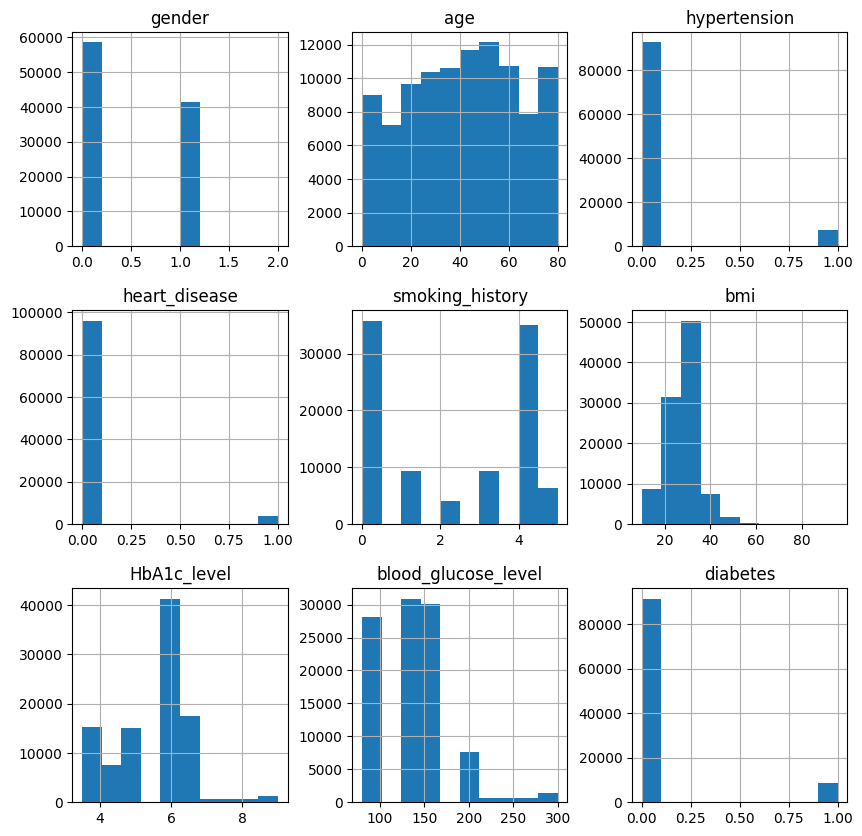

Correlation between columns:
                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939  

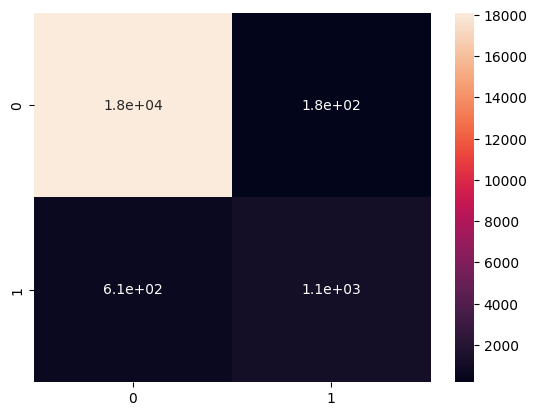

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data from CSV file
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
print(df.head(10))

# Perform EDA
print(df.shape)  # Get the number of rows and columns
print(df.describe())  # Get summary statistics
print(df.isnull().sum())  # Get the count of NaN or blank values

# Fill NaN or blank values with column mean values
df.fillna(df.mean(), inplace=True)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'gender' column
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

print(df.head(10))

# Visualize box plot for each column
#for col in df.columns:
 #   sns.boxplot(x=col, data=df)
  #  plt.show()

# Identify and drop outliers using the IQR method
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize histograms for each column
df.hist(figsize=(10,10))
plt.show()



# Assuming you already have a DataFrame named 'df'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation between columns:")
print(correlation_matrix)


# Visualize scatter plots for each pair of columns
#sns.pairplot(df)
#plt.show()

# Select the float datatype columns for the model
#float_columns = df.select_dtypes(include=['float']).columns
#print(float_columns)
#X = df[float_columns].values
#df1 = df.drop('smoking_history', axis=1, inplace=True)
print(df.columns)

X_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[X_columns].values
print(X)
y = df['diabetes'].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

# Train the logistic regression model
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# Test the model and calculate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)
plt.show()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv
